# **MNIST Handwritten Digit Recognition**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers, models

Load the dataset

In [2]:
(x_train, y_train), (x_test, y_test)  = tf.keras.datasets.mnist.load_data()

x_train[0][1:6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0]], dtype=uint8)

Normalize the values.

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
print('Number of images in the training dataset:', x_train.shape[0])
print('Number of images in the testing dataset:', x_test.shape[0])
print(f"Shape of the images in the training dataset: {x_train[0].shape}")

Number of images in the training dataset: 60000
Number of images in the testing dataset: 10000
Shape of the images in the training dataset: (28, 28)


### **Visualizing the data** 
In this section, we display the first 10 images from the MNIST training dataset along with their corresponding labels.

Each image is a 28x28 grayscale image representing a handwritten digit from 0 to 9.

We use matplotlib.pyplot.subplots to create a row of 10 subplots. Then, for each image:
- We use imshow to display the digit in grayscale.
- The set_title() method is used to label each image with its true digit label.
- Axes are turned off for a cleaner look.

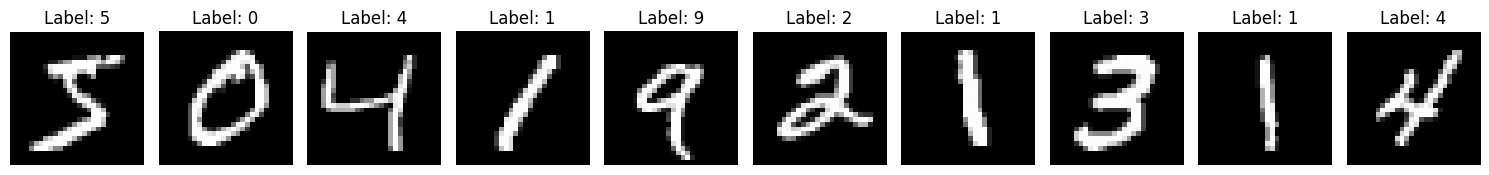

In [5]:
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axes[i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

Prepare the model

In [6]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Train the model

In [7]:
history = model.fit(
    x_train, y_train,
    epochs = 16,
    batch_size = 32,
)

Epoch 1/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8775 - loss: 0.4349
Epoch 2/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9689 - loss: 0.1056
Epoch 3/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9786 - loss: 0.0689
Epoch 4/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9836 - loss: 0.0504
Epoch 5/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9868 - loss: 0.0420
Epoch 6/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9901 - loss: 0.0320
Epoch 7/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9929 - loss: 0.0230
Epoch 8/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9924 - loss: 0.0227
Epoch 9/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9929 - loss: 0.0201
Epoch 10/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9945 - loss: 0.0166
Epoch 11/16
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9957 - loss: 0.0125
Epoch 12/16
1875/1875 ━━━━━━━━

Evaluate the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


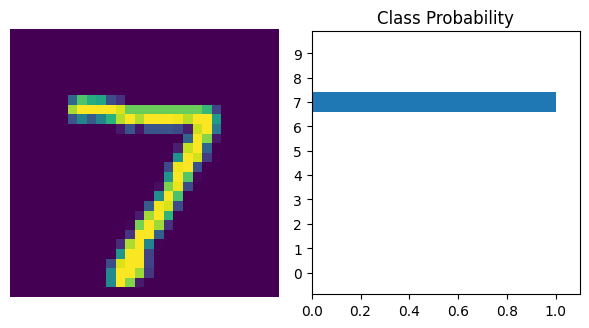

In [8]:
def view_classify(image, probabilities):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image)
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    
image, label = x_test[0], y_test[0]
probabilities = model.predict(image.reshape(1, 28, 28, 1))
view_classify(image,  probabilities[0])

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy of the neural network on the {x_test.shape[0]} test images: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.9776 - loss: 0.1125
Accuracy of the neural network on the 10000 test images: 98.11%
